In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split #splits data for training and testing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [2]:
file_path = 'DARKDS'

In [3]:
name_class = os.listdir(file_path)
name_class

['Akash', 'Preetam', 'Roja', 'Sandhya', 'Unknown']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths[-6:-1]

['DARKDS\\Unknown\\WIN_20240422_19_36_36_Pro_294.jpg',
 'DARKDS\\Unknown\\WIN_20240422_19_36_36_Pro_295.jpg',
 'DARKDS\\Unknown\\WIN_20240422_19_36_36_Pro_296.jpg',
 'DARKDS\\Unknown\\WIN_20240422_19_36_36_Pro_297.jpg',
 'DARKDS\\Unknown\\WIN_20240422_19_36_36_Pro_298.jpg']

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',
 'Akash',


In [7]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,DARKDS\Roja\WIN_20240429_11_15_47_Pro.jpg,Roja
1,DARKDS\Preetam\PREETHAMDI2 (19).jpg,Preetam
2,DARKDS\Preetam\PREETHAMDI2 (292).jpg,Preetam
3,DARKDS\Sandhya\SANDHYADI1 (206).jpg,Sandhya
4,DARKDS\Unknown\WIN_20240422_19_36_36_Pro_278.jpg,Unknown


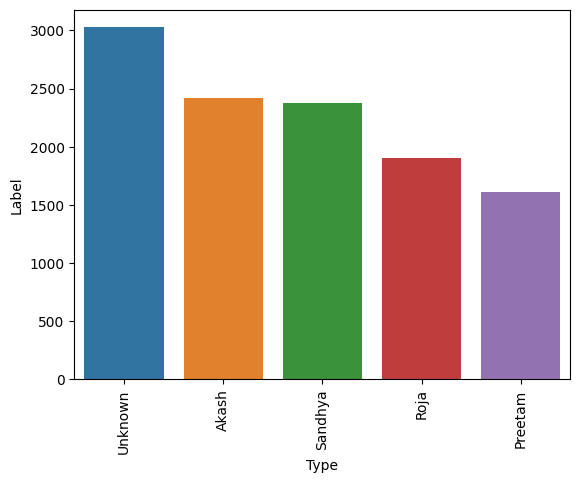

In [8]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [9]:
train, test = train_test_split(data, test_size=0.20, random_state=42)

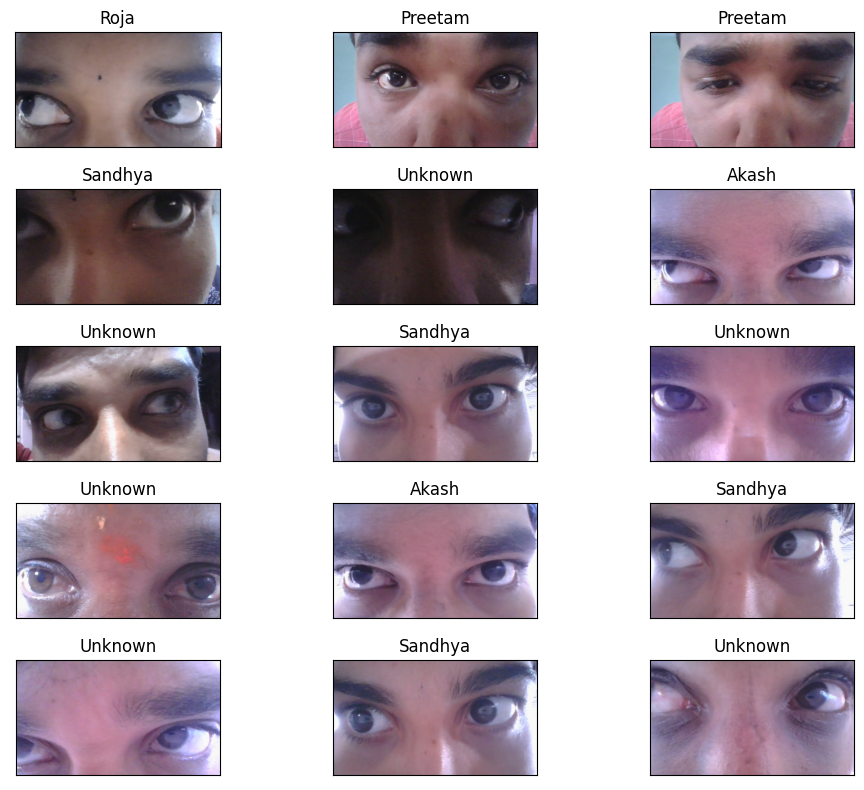

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [11]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

C:\Users\Zoro5\anaconda3\envs\leaf_disease\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 9072 validated image filenames belonging to 5 classes.
Found 2269 validated image filenames belonging to 5 classes.
Found 2269 validated image filenames belonging to 5 classes.


In [13]:
pretrained_model = ResNet50(
    input_shape=(256,256, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [14]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(5, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [17]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10
)

Epoch 1/10
284/284 [==============================] - 961s 3s/step - loss: 0.0655 - accuracy: 0.9805 - val_loss: 0.0032 - val_accuracy: 0.9991
Epoch 2/10
284/284 [==============================] - 1140s 4s/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 4.9951e-04 - val_accuracy: 1.0000
Epoch 3/10
284/284 [==============================] - 996s 4s/step - loss: 1.9463e-04 - accuracy: 1.0000 - val_loss: 2.9693e-04 - val_accuracy: 1.0000
Epoch 4/10
284/284 [==============================] - 1287s 5s/step - loss: 1.1100e-04 - accuracy: 1.0000 - val_loss: 2.6953e-04 - val_accuracy: 1.0000
Epoch 5/10
284/284 [==============================] - 1454s 5s/step - loss: 7.5796e-05 - accuracy: 1.0000 - val_loss: 2.8244e-04 - val_accuracy: 1.0000
Epoch 6/10
284/284 [==============================] - 1385s 5s/step - loss: 5.5281e-05 - accuracy: 1.0000 - val_loss: 1.7934e-04 - val_accuracy: 1.0000
Epoch 7/10
284/284 [==============================] - 1387s 5s/step - loss: 3.7740e-05 - accuracy: 1.0

In [18]:
model.save("main_model.h5")  

C:\Users\Zoro5\anaconda3\envs\leaf_disease\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


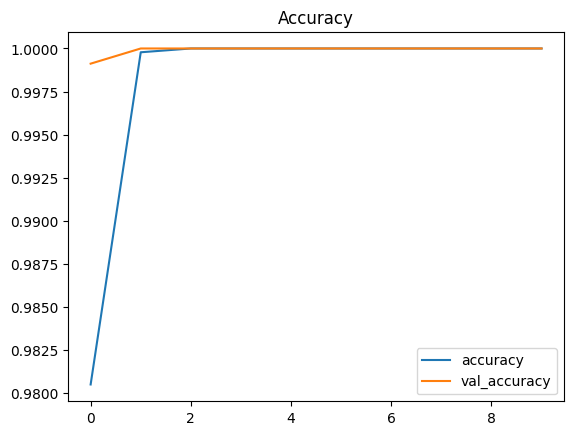

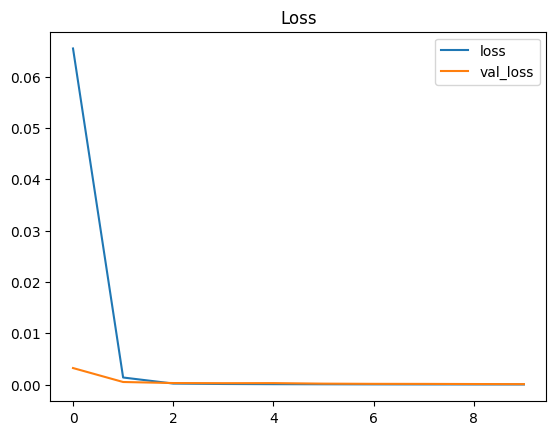

In [19]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [20]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.00008
Test Accuracy: 100.00%


In [21]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [22]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       Akash       1.00      1.00      1.00       485
     Preetam       1.00      1.00      1.00       335
        Roja       1.00      1.00      1.00       354
     Sandhya       1.00      1.00      1.00       473
     Unknown       1.00      1.00      1.00       622

    accuracy                           1.00      2269
   macro avg       1.00      1.00      1.00      2269
weighted avg       1.00      1.00      1.00      2269



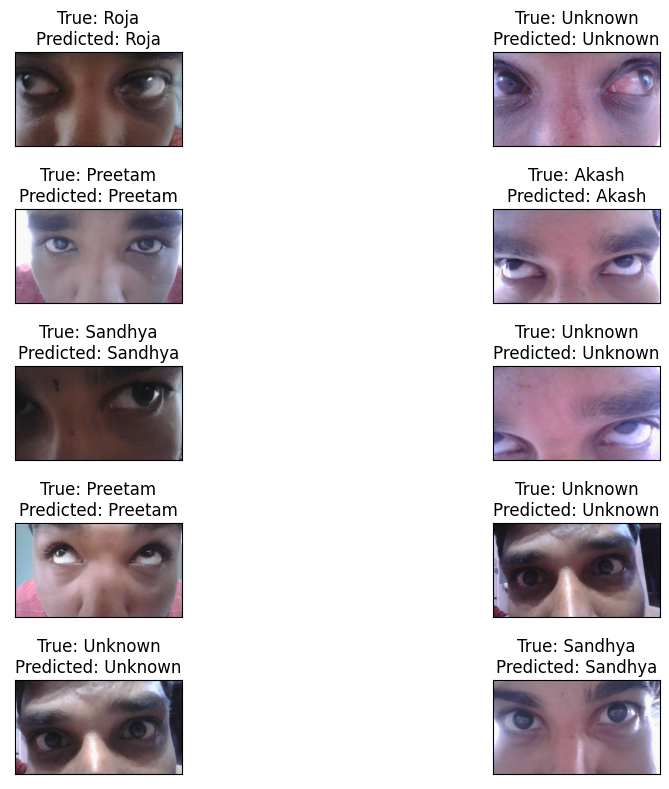

In [23]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'C:/Users/Zoro5/Desktop/full_code/DARKDS/Akash/0001.jpg'

img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))


[[99  0  0  0  0]]
